In [8]:
#change : added resize=0.2, width_shift and height_shift = 0.3, rotation_range = 10
#Conclusion : even more data agumentation helps
#basic - 98%, blonds - 80-85% 

In [9]:
#all imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import csv
import imageio
from datetime import datetime

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import np_utils
from keras import backend as K
from keras.optimizers import SGD
from keras import regularizers


In [10]:
K.set_image_dim_ordering('th')
seed = 7
np.random.seed(seed)
#start = datetime.time()
#print start

In [11]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

def readimagesfromfolder(path, color, show):
	imagepackage_list = []
	imagepackage = []
	imagelist = []
	filelist = sorted(os.listdir(path))
	for filename in filelist:
		fullfilename =  path + filename
		#print(fullfilename)        
		singleimage = imageio.imread(fullfilename)
		singleimage = cv2.resize(singleimage,(96,96), interpolation=cv2.INTER_AREA)        
		singleimage = rgb2gray(singleimage)
		#print(singleimage)        
		if show==1:
			plt.imshow(singleimage)
			plt.show()
		imagepackage.append(singleimage)
		imagepackage_list.append(imagepackage)        
		imagepackage = []        
	#print(len(imagepackage))        
	imagepackage_list = np.float32(imagepackage_list)
	#cv2.destroyAllWindows()
	return imagepackage_list

def readlabelfromcsv(filename):
    training_y = []
    with open(filename) as f:
        #training_y.append(f.readline())
        content = csv.reader(f)
        for line in content:
            #print(line[0])
            training_y.append(int(line[0]))
    return training_y




In [12]:
       
folderpath = 'data/basic/training/'
X_train=readimagesfromfolder(folderpath, 0, 0)
print(np.shape(X_train))

folderpath = 'data/basic/test/'
X_test=readimagesfromfolder(folderpath, 0, 0)
print(np.shape(X_test))

y_train = readlabelfromcsv("data/basic/training.csv")
y_test = readlabelfromcsv("data/basic/test.csv")

print(y_train)
print(np.shape(y_train))

print(y_test)
print(np.shape(y_test))

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=10,# randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.2,
    width_shift_range=0.3,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.3,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    fill_mode="constant", 
    cval=0) # randomly flip images

datagen.fit(X_train)

(162, 1, 96, 96)
(48, 1, 96, 96)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
(162,)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
(48,)


In [13]:


# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Epoch 1/100
Epoch 00000: val_acc improved from -inf to 0.70833, saving model to lastversion_epoch_00_val_acc_0.71.hd5
31s - loss: 0.9573 - acc: 0.5259 - val_loss: 0.6805 - val_acc: 0.7083
Epoch 2/100
Epoch 00001: val_acc improved from 0.70833 to 0.83333, saving model to lastversion_epoch_01_val_acc_0.83.hd5
27s - loss: 0.6811 - acc: 0.7109 - val_loss: 0.4755 - val_acc: 0.8333
Epoch 3/100
Epoch 00002: val_acc did not improve
19s - loss: 0.5121 - acc: 0.7933 - val_loss: 0.6936 - val_acc: 0.7708
Epoch 4/100
Epoch 00003: val_acc improved from 0.83333 to 0.85417, saving model to lastversion_epoch_03_val_acc_0.85.hd5
24s - loss: 0.4001 - acc: 0.8433 - val_loss: 0.4936 - val_acc: 0.8542
Epoch 5/100
Epoch 00004: val_acc improved from 0.85417 to 0.87500, saving model to lastversion_epoch_04_val_acc_0.87.hd5
21s - loss: 0.2956 - acc: 0.8875 - val_loss: 0.3593 - val_acc: 0.8750
Epoch 6/100
Epoch 00005: val_acc did not improve
19s - loss: 0.2452 - acc: 0.9068 - val_loss: 0.8924 - val_acc: 0.7917
E

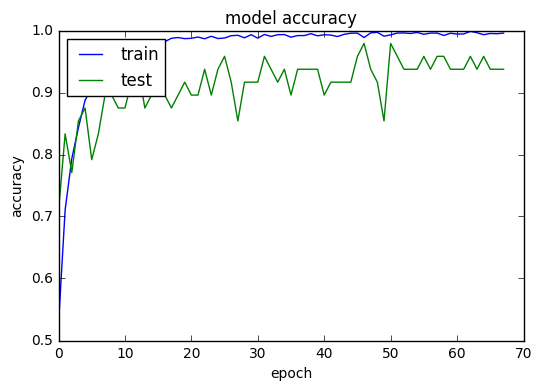

[0.29839578151586466, 0.9375]
Baseline Error: 6.25%


In [14]:
def larger_model():
	# create model
	model = Sequential()
	model.add(Convolution2D(16, 3, 1, border_mode='same', input_shape=(1, 96, 96), activation='relu'))
	model.add(Convolution2D(24, 5, 3, border_mode='same', activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Convolution2D(32, 5, 3, border_mode='same', activation='relu'))
	model.add(Convolution2D(48, 5, 3, border_mode='same', activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(1000, activation='relu'))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# build the model
model = larger_model()
filename = "lastversion_epoch_{epoch:02d}_val_acc_{val_acc:.2f}.hd5"

earlystopping = EarlyStopping(monitor = "val_acc", patience = 20, verbose=1, mode="auto")
checkpoint = ModelCheckpoint(filename, monitor = "val_acc", verbose =1, mode="auto", save_best_only = "True")

list_of_callbacks = [earlystopping, checkpoint]

# Fit the model
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=25), callbacks = list_of_callbacks, samples_per_epoch = 5000, nb_epoch = 100, verbose=2, validation_data=(X_test, y_test))
#model.save("chybadobry.hd5")
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("model accuracy")

plt.legend(["train", "test"], loc="upper left")
plt.show()

print scores
print("Baseline Error: %.2f%%" % (100-scores[1]*100))